Nama: Ch Angga Marcelio

Student ID: MC315D5Y1131

**Pertanyaan yang akan dijawab melalui analisis data ini, yaitu:**
1. Bagaimana kita dapat memprediksi jumlah penyewaan sepeda pada hari tertentu berdasarkan faktor-faktor seperti suhu, kelembapan, dan kondisi cuaca?
2. Bisakah kita membagi hari-hari menjadi 3 kategori berdasarkan tingkat penggunaan sepeda (misalnya: musim dengan penggunaan tinggi, sedang, dan rendah) untuk membantu dalam strategi perawatan sepeda?
3. Apakah terdapat pola penggunaan sepeda yang berulang pada waktu tertentu, seperti tren penggunaan sepeda yang meningkat pada akhir pekan atau selama musim panas?

# **Import  Library**

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **Load Dataset**

In [399]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/day.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# **Data Preprocessing**

In [400]:
# Menampilkan 5 data pertama
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [401]:
# Menampilkan Statistik deskriptif
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [402]:
# Mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [403]:
# Mengecek missing values
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [404]:
# Mengecek jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print('Jumlah data duplikat:', jumlah_duplikat)

Jumlah data duplikat: 0


In [405]:
# Hapus kolom yang tidak relevan
df.drop(['instant'], axis=1, inplace=True)

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menghapus Kolom yang tidak digunakan: Kolom instant telah dihapus karena hanya berisi ID unik yang tidak memiliki kontribusi terhadap analisis data.

# **EDA (Exploraty data Analysis)**

**1. Mengelompokkan berdasarkan Season**

In [406]:
print(df['season'].unique())

[1 2 3 4]


In [407]:
print(df.groupby('season')['temp'].mean())

season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64


In [408]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['month'] = df['dteday'].dt.month
print(df.groupby(['season', 'month'])['temp'].mean())

season  month
1       1        0.236444
        2        0.299226
        3        0.390549
        12       0.297951
2       3        0.390520
        4        0.469999
        5        0.594798
        6        0.662542
3       6        0.727208
        7        0.755470
        8        0.708582
        9        0.624335
4       9        0.594896
        10       0.485012
        11       0.369220
        12       0.338375
Name: temp, dtype: float64


In [409]:
df['season'] = df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [410]:
df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})


cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

2. Mengelompokkan berdasarkan Weathersit

In [411]:
df['weathersit'] = df['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'
})

In [412]:
df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})


cnt                           
             max  min         mean      sum
weathersit                                 
Clear       8714  431  4876.786177  2257952
Light Rain  4639   22  1803.285714    37869
Mist        8362  605  4035.862348   996858

3. Mengelompokkan berdasarkan Weekdy daaan Weekend

In [413]:
df['mnth'] = df['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [414]:
df['weekday'] = df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

In [415]:
df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

In [416]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,2011-01-01,Spring,0,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2011-01-02,Spring,0,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,2011-01-03,Spring,0,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
3,2011-01-04,Spring,0,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1
4,2011-01-05,Spring,0,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1


# **Visualisasi dan eksplorasi analisis**

**1. Bagaimana kita dapat memprediksi jumlah penyewaan sepeda pada hari tertentu berdasarkan faktor-faktor seperti suhu, kelembapan, dan kondisi cuaca?**

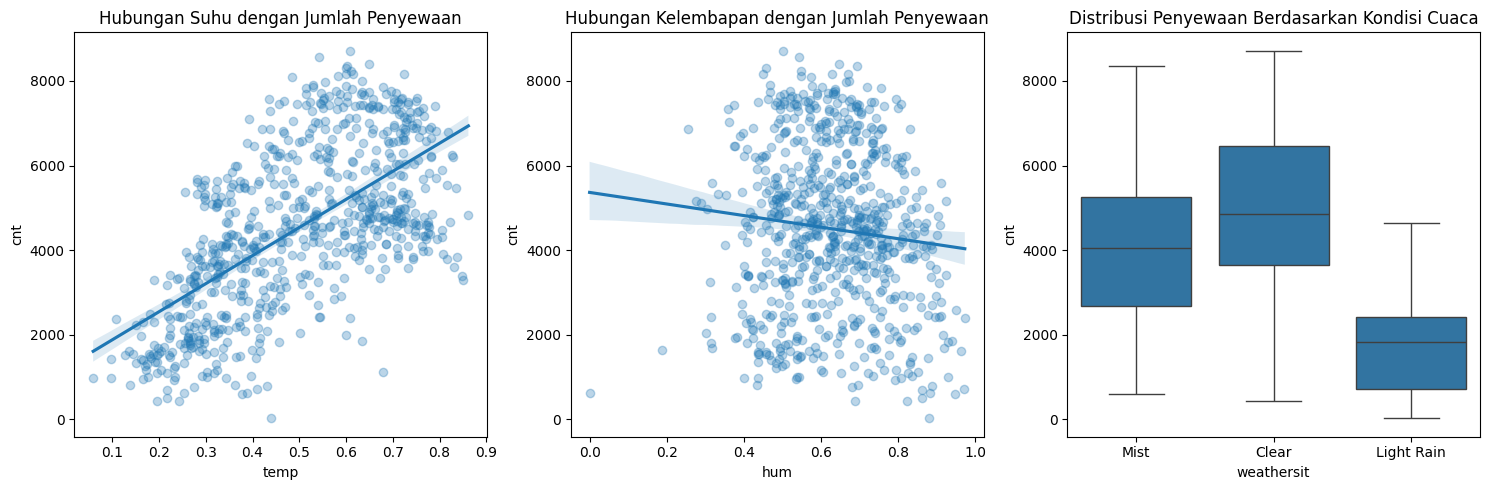

In [417]:
# Visualisasi hubungan faktor cuaca dengan jumlah penyewaan
plt.figure(figsize=(15,5))

# Scatter plot suhu vs jumlah penyewaan
plt.subplot(1,3,1)
sns.regplot(x='temp', y='cnt', data=df, scatter_kws={'alpha':0.3})
plt.title('Hubungan Suhu dengan Jumlah Penyewaan')

# Scatter plot kelembapan vs jumlah penyewaan
plt.subplot(1,3,2)
sns.regplot(x='hum', y='cnt', data=df, scatter_kws={'alpha':0.3})
plt.title('Hubungan Kelembapan dengan Jumlah Penyewaan')

# Boxplot kondisi cuaca vs jumlah penyewaan
plt.subplot(1,3,3)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca')

plt.tight_layout()
plt.show()

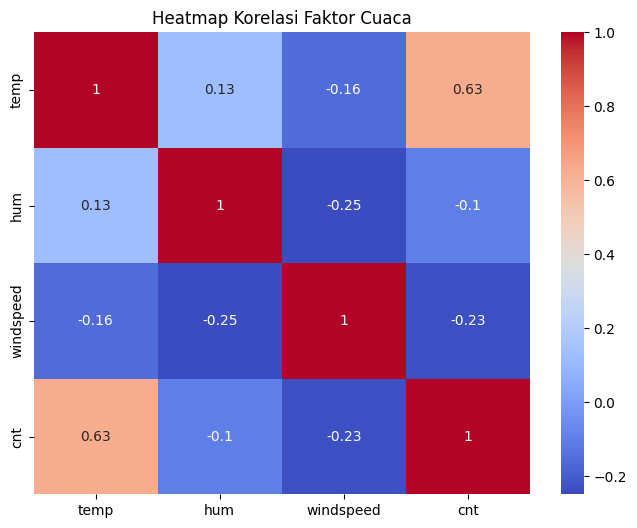

In [418]:
# Heatmap korelasi
corr_matrix = df[['temp','hum','windspeed','cnt']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Faktor Cuaca')
plt.show()

Berdasarkan visualisasi yang ditampilkan, kesimpulan terkait hubungan faktor cuaca dengan jumlah penyewaan sepeda, yaitu:

1. Hubungan Suhu dengan Jumlah Penyewaan
Grafik menunjukkan bahwa terdapat korelasi positif antara suhu (temp) dan jumlah penyewaan (cnt).
Artinya, semakin tinggi suhu, cenderung semakin banyak jumlah penyewaan sepeda. Ini bisa disebabkan karena cuaca yang lebih hangat lebih nyaman untuk bersepeda.
2. Hubungan Kelembapan dengan Jumlah Penyewaan
Grafik menunjukkan adanya korelasi negatif yang lemah antara kelembapan (hum) dan jumlah penyewaan (cnt).
Ini berarti semakin tinggi kelembapan, cenderung terjadi sedikit penurunan dalam jumlah penyewaan sepeda, meskipun efeknya tidak terlalu signifikan.
3. Distribusi Penyewaan Berdasarkan Kondisi Cuaca
Grafik menunjukkan bahwa jumlah penyewaan tertinggi terjadi saat kondisi cuaca cerah (clear weather).
Penyewaan berkurang pada kondisi berkabut (mist) dan menurun secara signifikan pada kondisi hujan ringan (light rain).
4. Heatmap Korelasi Faktor Cuaca
Suhu memiliki korelasi positif yang cukup kuat terhadap jumlah penyewaan sepeda (nilai korelasi sekitar 0.63).
Kelembapan dan kecepatan angin memiliki korelasi yang relatif lebih lemah terhadap jumlah penyewaan.


**2. Bisakah kita membagi hari-hari menjadi 3 kategori berdasarkan tingkat penggunaan sepeda (misalnya: musim dengan penggunaan tinggi, sedang, dan rendah) untuk membantu dalam strategi perawatan sepeda?**

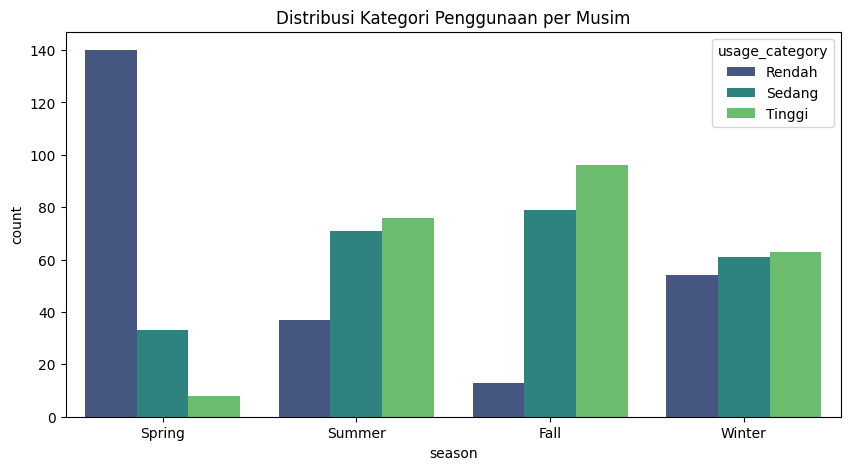

In [419]:
# Visualisasi distribusi kategori
df['usage_category'] = pd.qcut(df['cnt'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Hubungan kategori dengan musim
plt.figure(figsize=(10,5))
sns.countplot(x='season', hue='usage_category', data=df, palette='viridis')
plt.title('Distribusi Kategori Penggunaan per Musim')
plt.show()


Berdasarkan visualisasi yang ditampilkan, kesimpulannya, yaitu :

1. Musim semi (Spring) memiliki dominasi kategori penggunaan rendah yang sangat tinggi dibandingkan musim lainnya. Ini bisa menunjukkan bahwa pada musim semi, jumlah pengguna sepeda cenderung lebih sedikit, kemungkinan karena kondisi cuaca yang masih belum optimal.
2. Musim panas (Summer) dan musim gugur (Fall) memiliki distribusi yang lebih seimbang di antara kategori sedang dan tinggi, menunjukkan bahwa kedua musim ini merupakan periode dengan tingkat penggunaan sepeda yang cukup tinggi. Ini menandakan bahwa sepeda cenderung lebih banyak digunakan saat kondisi cuaca lebih hangat dan nyaman.
3. Musim dingin (Winter) memiliki jumlah penggunaan yang relatif lebih rendah secara keseluruhan, tetapi distribusinya cukup merata antara kategori rendah, sedang, dan tinggi, yang menunjukkan adanya variabilitas pengguna pada musim ini.

**3. Apakah terdapat pola penggunaan sepeda yang berulang pada waktu tertentu, seperti tren penggunaan sepeda yang meningkat pada akhir pekan atau selama musim panas?**

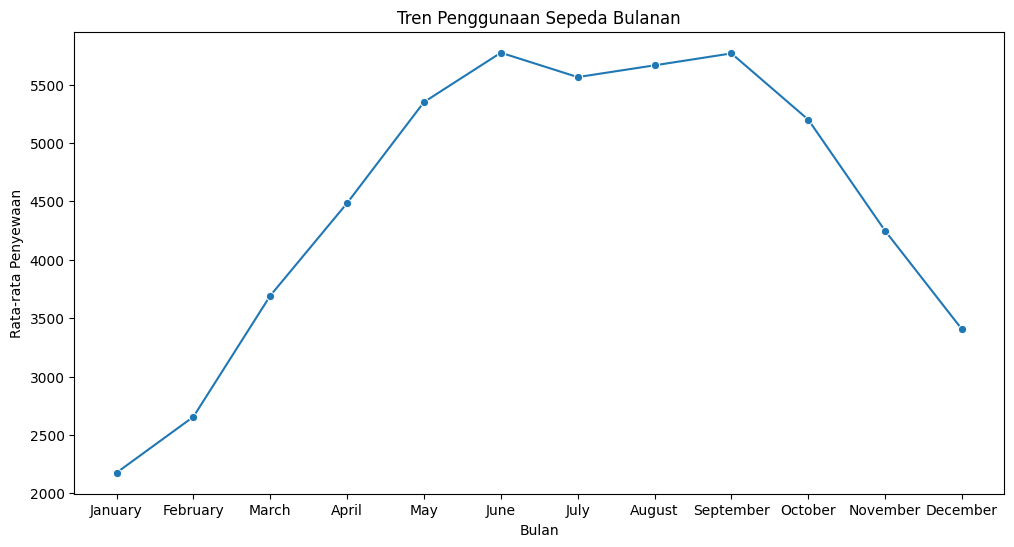

In [420]:
# Tren bulanan (versi diperbaiki)
plt.figure(figsize=(12,6))
sns.lineplot(
    x='mnth',
    y='cnt',
    data=df,
    errorbar=None,
    marker='o'
)
plt.title('Tren Penggunaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

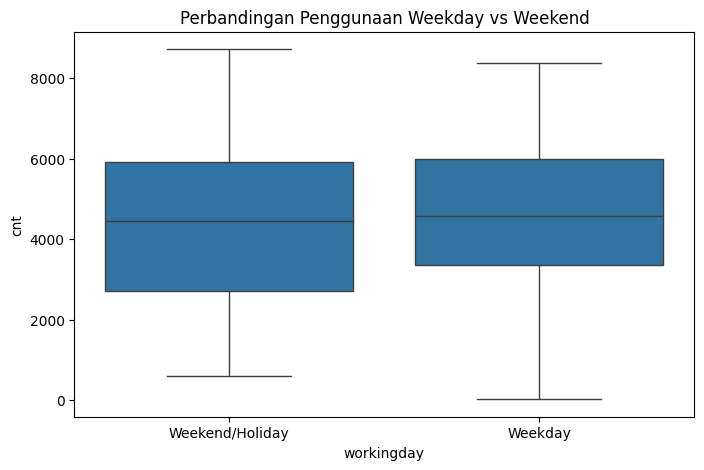

In [422]:
# Perbandingan weekday vs weekend
plt.figure(figsize=(8,5))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.xticks([0,1], ['Weekend/Holiday', 'Weekday'])
plt.title('Perbandingan Penggunaan Weekday vs Weekend')
plt.show()

Text(0, 0.5, 'Jumlah Penyewaan')

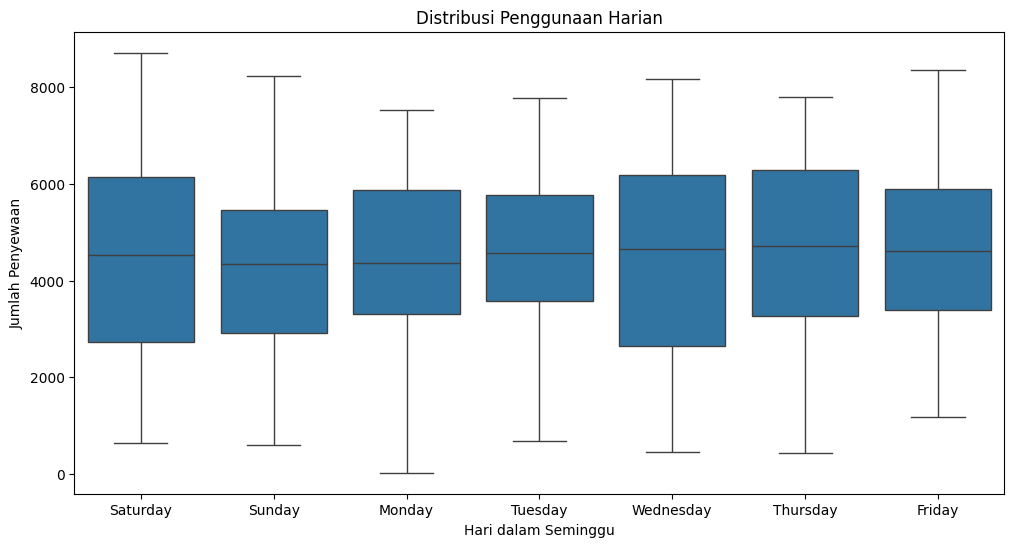

In [421]:
# Tren harian
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribusi Penggunaan Harian')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')

Berdasarkan visualisasi yang ditampilkan, kesimpulan terkait tren bulanan dan perbandingan penggunaan sepeda pada weekday vs weekend:

1. Tren Penggunaan Sepeda Bulanan

- Penggunaan sepeda cenderung meningkat dari bulan Januari hingga mencapai puncaknya pada bulan Juni hingga September.
- Setelah itu, jumlah penyewaan mulai menurun secara signifikan pada bulan Oktober hingga Desember.
- Tren ini menunjukkan bahwa musim panas atau kondisi cuaca yang lebih hangat cenderung menarik lebih banyak pengguna sepeda, sedangkan pada bulan-bulan akhir tahun (kemungkinan musim dingin atau hujan) jumlah penyewaan menurun.

2. Perbandingan Penggunaan Weekday vs Weekend

- Distribusi penyewaan sepeda pada weekday dan weekend terlihat cukup mirip.
Namun, terdapat sedikit kecenderungan bahwa penggunaan sepeda pada weekday memiliki lebih banyak penyebaran data pada jumlah yang tinggi dibandingkan weekend.
- Hal ini bisa menunjukkan bahwa sepeda mungkin lebih banyak digunakan untuk keperluan transportasi rutin (seperti berangkat kerja atau kuliah) pada weekday, sedangkan pada weekend, penggunaan sepeda mungkin lebih bersifat rekreasi.

# **Conclusion**


1. Hubungan Faktor Cuaca dengan Jumlah Penyewaan Sepeda
- Suhu (temp) memiliki hubungan positif dengan jumlah penyewaan sepeda. Artinya, semakin hangat suhu, jumlah penyewaan cenderung meningkat.
Kelembapan (hum) menunjukkan hubungan negatif yang lemah, menandakan bahwa kelembapan yang tinggi cenderung sedikit mengurangi jumlah penyewaan sepeda.
Kondisi cuaca seperti Clear weather memiliki tingkat penyewaan tertinggi, sedangkan kondisi hujan ringan (Light Rain) memiliki tingkat penyewaan yang lebih rendah.
- Implikasi: Faktor cuaca dapat dijadikan acuan untuk memprediksi tingkat penyewaan sepeda, terutama pada hari dengan cuaca cerah.


2. Distribusi Kategori Penggunaan Sepeda per Musim
- Musim semi (Spring) didominasi oleh kategori penggunaan rendah, menunjukkan bahwa musim ini memiliki aktivitas penyewaan yang lebih sedikit.
Musim panas (Summer) dan musim gugur (Fall) menunjukkan dominasi kategori penggunaan sedang dan tinggi, yang menandakan lonjakan penyewaan pada periode tersebut.
- Musim dingin (Winter) menunjukkan distribusi yang cukup merata, dengan kecenderungan ke kategori rendah dan sedang.
- Implikasi: Strategi perawatan sepeda dapat difokuskan pada persiapan sepeda menjelang musim panas dan musim gugur, karena pada periode tersebut sepeda lebih sering digunakan.

3. Tren Penyewaan Sepeda Bulanan
- Penyewaan sepeda mengalami peningkatan signifikan dari Januari hingga mencapai puncaknya pada Juni dan Juli, lalu mulai menurun pada Oktober dan turun drastis di Desember.
- Implikasi: Promosi layanan penyewaan sepeda dapat dimaksimalkan pada pertengahan tahun untuk memanfaatkan periode puncak penggunaan.

4. Perbandingan Penggunaan pada Weekday vs Weekend
- Penggunaan sepeda pada weekday dan weekend memiliki distribusi yang relatif mirip, namun terdapat sedikit peningkatan penggunaan pada weekday.
- Implikasi: Strategi penambahan sepeda atau perawatan berkala sebaiknya mempertimbangkan kedua periode ini secara seimbang.
